In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
#倒入一些必要的库

In [105]:
#读取数据
df1=pd.read_csv('data.csv') 
df1=df1.iloc[:,:]
df1.tail()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
341,5198.125504,5019.355936,4895.199040,4806.742144,4725.795136,4667.236096,4579.045504,4534.895296,4506.000160,4471.948768,...,7906.017376,7879.659040,7698.652672,7670.227648,7486.079680,7255.845184,6949.342624,6606.680320,6133.446688,5636.741920
342,5221.149088,5018.849728,4888.913632,4782.699040,4687.741600,4647.459040,4565.634976,4498.965184,4461.136576,4425.564064,...,7215.516256,7172.341120,7003.842784,6978.192352,6835.899040,6694.115296,6455.735296,6193.173472,5778.671872,5357.560960
343,5007.711712,4823.014816,4697.942944,4588.171072,4484.792032,4390.284544,4302.995776,4242.501760,4185.177856,4155.743584,...,5776.432192,5708.148448,5646.307648,5664.270112,5643.042784,5585.970112,5440.096576,5249.950912,4882.170592,4525.087168
344,4229.335936,4093.134016,3966.636736,3884.231392,3806.086816,3749.134816,3693.141952,3642.260800,3624.352672,3612.573664,...,7875.753952,7866.949888,7700.455936,7680.828448,7504.637536,7248.918400,6931.314016,6517.294816,5991.484384,5486.216416
345,5090.080000,4912.570048,4800.568288,4719.091552,4659.062944,4594.057216,4532.040160,4477.522144,4422.483904,4402.484704,...,7971.206368,7979.907808,7764.568768,7754.018560,7542.967168,7314.322144,6985.676416,6558.474976,6047.793472,5505.483424


Text(0.5, 1.0, 'by days')

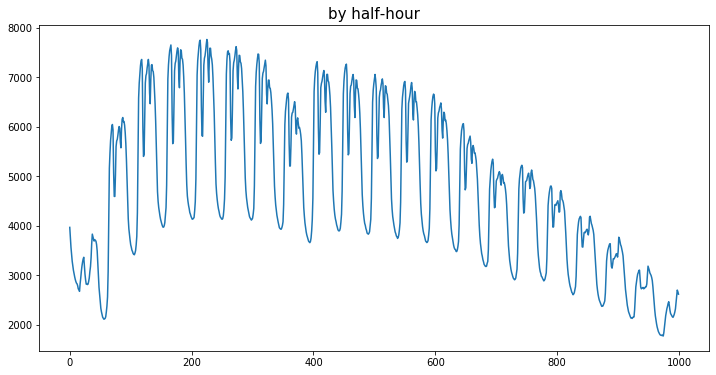

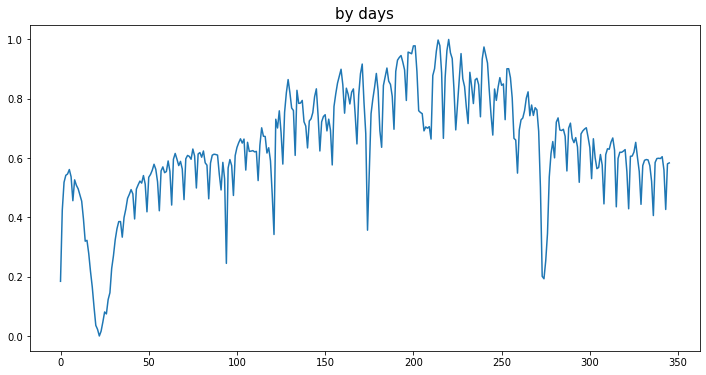

In [155]:
draw1=df1.values.reshape(1,-1)
draw1=draw1[0,:]
draw2=df['48']
plt.figure(figsize=(12,6))
plt.plot(draw1[0:1000])
plt.title("by half-hour",fontsize='15') #添加标题
plt.figure(figsize=(12,6))
plt.plot(draw2)
plt.title("by days",fontsize='15') #添加标题

In [106]:
#进行数据归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
X=df.iloc[:-1,:]
y=df.iloc[1:,-1]
print(X.shape)
print(y.shape)

(345, 48)
(345,)


In [107]:
#构造训练集测试集 
y=pd.DataFrame(y.values,columns=['target'])
x=X
input_size=len(x.iloc[1,:])
cut=len(y)//10#取最后cut=10天为测试集
X_train, X_test=x.iloc[:-cut],x.iloc[-cut:]#列表的切片操作
y_train, y_test=y.iloc[:-cut],y.iloc[-cut:]
X_train,X_test,y_train,y_test=X_train.values,X_test.values,y_train.values,y_test.values
x.iloc[:-cut]
print(X_train.size)#通过输出训练集测试集的大小来判断数据格式正确。
print(X_test.size)
print(y_train.size)
print(y_test.size)

14928
1632
311
34


In [108]:
# 建立线性回归模型 预测
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model = lr.fit(X_train, y_train) 

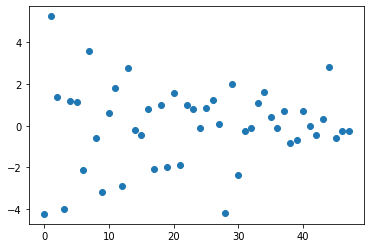

In [178]:
plt.plot(lr.coef_[0,],'o')

Text(0.5, 1.0, 'Train Data')

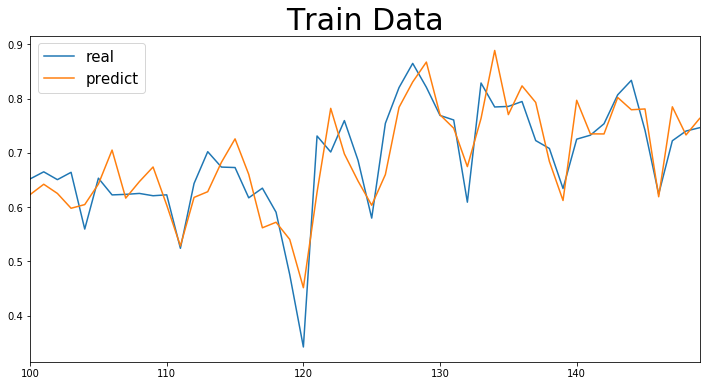

In [109]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
#展示在训练集上的表现 
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题

Text(0.5, 1.0, 'Test Data')

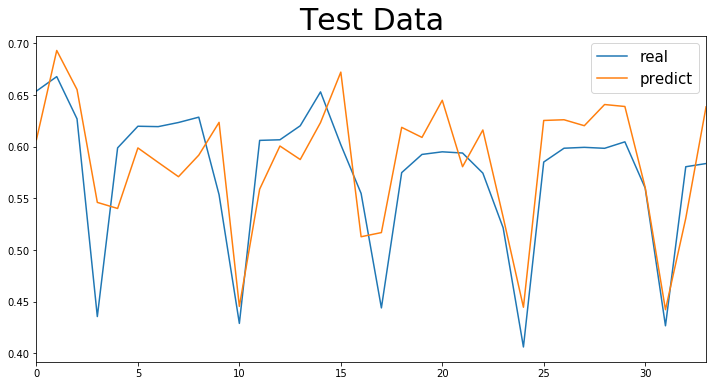

In [110]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
#展示在测试集上的表现 
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题

In [120]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,  y_test[:,0]) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.03688606538124096
0.0022075106624447937
7.449212148432968
测试集上的MAE/MSE/MAPE
0.03828619547514183
0.0019448026396183518
6.588517863244481
预测涨跌正确: 0.6666666666666666


In [121]:
# 建立随机森林模型 预测
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model = rf.fit(X_train, y_train) 

E:\anoconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\anoconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Train Data')

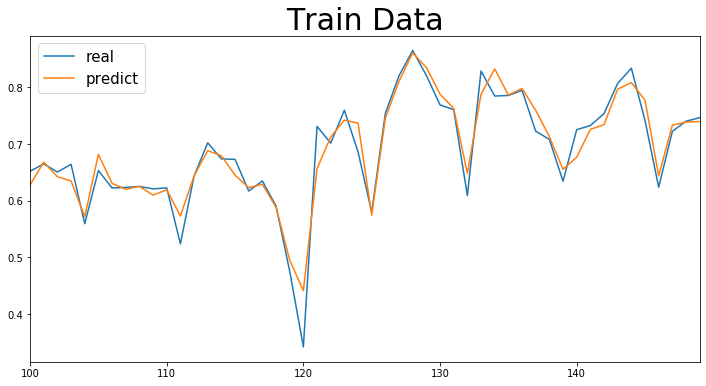

In [122]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
#展示在训练集上的表现 
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题

Text(0.5, 1.0, 'Test Data')

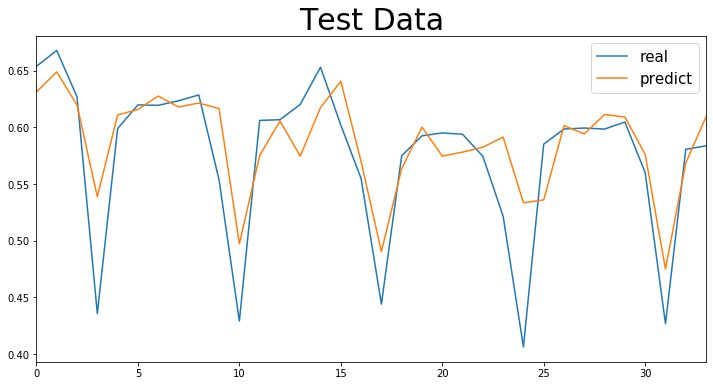

In [123]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
#展示在测试集上的表现 
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题

In [125]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train[:,0]) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,  y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.018939746886512822
0.00079925013809814
4.451955874273981
测试集上的MAE/MSE/MAPE
0.028541580962676918
0.001667187642408793
10.141988536464758
预测涨跌正确: 0.6666666666666666


In [126]:
# Fit regression model
from sklearn.svm import LinearSVR  
svr = LinearSVR() 
model = svr.fit(X_train, y_train)

E:\anoconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anoconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 1.0, 'Train Data')

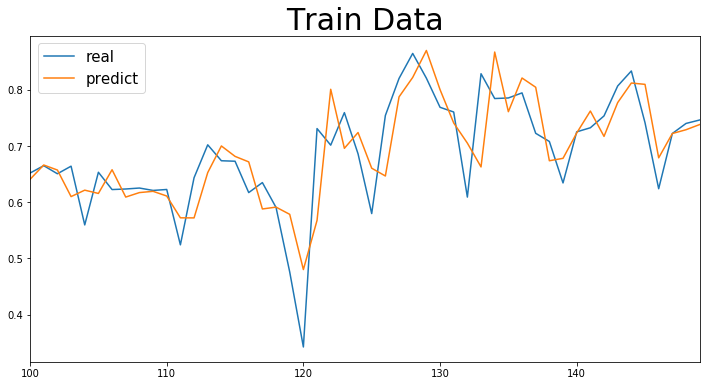

In [127]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
#展示在训练集上的表现 
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题

Text(0.5, 1.0, 'Test Data')

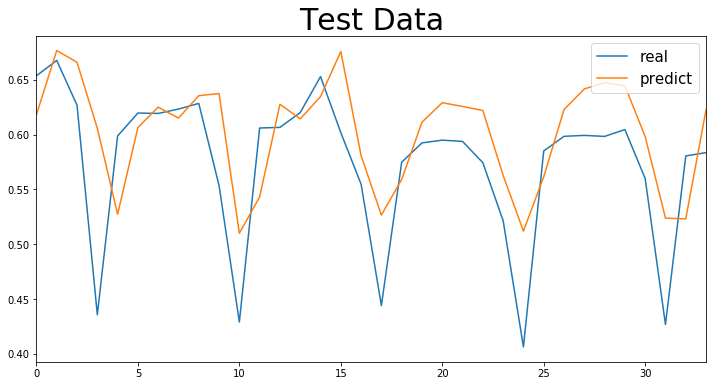

In [128]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
#展示在测试集上的表现 
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题

In [129]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train[:,0]) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,  y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.044691728534802376
0.003341371743488307
8.573872304525523
测试集上的MAE/MSE/MAPE
0.04477832419605526
0.0032150717814948162
10.933897652783196
预测涨跌正确: 0.7272727272727273


In [36]:
#建立bp模型 训练 
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
model = Sequential()  #层次模型
model.add(Dense(16,input_dim=input_size,init='uniform')) #输入层，Dense表示BP层
model.add(Activation('relu'))  #添加激活函数
model.add(Dense(4,init='uniform')) #中间层
model.add(Activation('relu'))  #添加激活函数
model.add(Dense(1))  #输出层
model.compile(loss='mean_squared_error', optimizer='Adam') #编译模型
model.fit(X_train, y_train, nb_epoch = 50, batch_size = 256) #训练模型nb_epoch=50次

E:\anoconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, input_dim=48, kernel_initializer="uniform")`
  
E:\anoconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="uniform")`
  
E:\anoconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/50
311/311 [==============================] - 0s 821us/step - loss: 0.4287
Epoch 2/50
311/311 [==============================] - 0s 26us/step - loss: 0.3870
Epoch 3/50
311/311 [==============================] - 0s 16us/step - loss: 0.3493
Epoch 4/50
311/311 [==============================] - 0s 26us/step - loss: 0.3080
Epoch 5/50
311/311 [==============================] - 0s 19us/step - loss: 0.2660
Epoch 6/50
311/311 [==============================] - 0s 26us/step - loss: 0.2222
Epoch 7/50
311/311 [==============================] - 0s 22us/step - loss: 0.1789
Epoch 8/50
311/311 [==============================] - 0s 26us/step - loss: 0.1375
Epoch 9/50
311/311 [==============================] - 0s 26us/step - loss: 0.0995
Epoch 10/50
311/311 [==============================] - 0s 22us/step - loss: 0.0663
Epoch 11/50
311/311 [==============================] - 0s 22us/step - loss: 0.0403
Epoch 12/50
311/311 [==============================] - 0s 26us/step - loss: 0.0220
Epoch 13/50


Text(0.5, 1.0, 'Train Data')

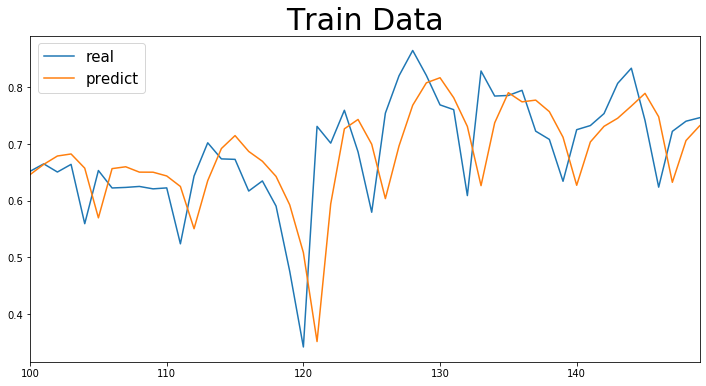

In [37]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

Text(0.5, 1.0, 'Test Data')

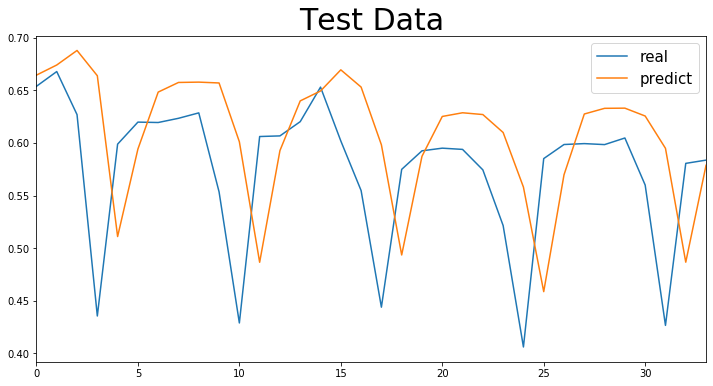

In [38]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [39]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train[:,0]) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,  y_test[:,0]) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.07608115139041978
0.010021622320887272
13.90027335303405
测试集上的MAE/MSE/MAPE
0.06725801706012535
0.007757606516503033
11.496234080976981
预测涨跌正确: 0.696969696969697


In [47]:
#设置LSTM、GRU的时间窗
window=5
#处理LSTM数据
stock=df
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.as_matrix() #pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度5+1
result = []
for index in range(len(data) - sequence_length):#循环170-5次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到161个样本，样本形式为6天*3特征
row = round(0.9 * result.shape[0])#划分训练集测试集
train = result[:int(row), :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1]
#reshape成 5天*3特征
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

E:\anoconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [84]:
#建立LSTM模型 训练
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
#建立、训练模型过程
d = 0.01
model = Sequential()#建立层次模型
model.add(LSTM(32, input_shape=(window, input_size), return_sequences=True))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(LSTM(16, input_shape=(window, input_size), return_sequences=False))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(Dense(2,init='uniform',activation='relu'))   #建立全连接层     
model.add(Dense(1,init='uniform',activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch =1000, batch_size = 256) #训练模型nb_epoch次

E:\anoconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
E:\anoconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]
E:\anoconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/1000
306/306 [==============================] - 1s 4ms/step - loss: 0.4655 - accuracy: 0.0033
Epoch 2/1000
306/306 [==============================] - 0s 101us/step - loss: 0.4617 - accuracy: 0.0033
Epoch 3/1000
306/306 [==============================] - 0s 98us/step - loss: 0.4579 - accuracy: 0.0033
Epoch 4/1000
306/306 [==============================] - 0s 95us/step - loss: 0.4539 - accuracy: 0.0033
Epoch 5/1000
306/306 [==============================] - 0s 120us/step - loss: 0.4498 - accuracy: 0.0033
Epoch 6/1000
306/306 [==============================] - 0s 101us/step - loss: 0.4455 - accuracy: 0.0033
Epoch 7/1000
306/306 [==============================] - 0s 101us/step - loss: 0.4410 - accuracy: 0.0033
Epoch 8/1000
306/306 [==============================] - 0s 91us/step - loss: 0.4362 - accuracy: 0.0033
Epoch 9/1000
306/306 [==============================] - ETA: 0s - loss: 0.4356 - accuracy: 0.00 - 0s 88us/step - loss: 0.4312 - accuracy: 0.0033
Epoch 10/1000
306/306 [=====

306/306 [==============================] - 0s 78us/step - loss: 0.0114 - accuracy: 0.0065
Epoch 79/1000
306/306 [==============================] - 0s 108us/step - loss: 0.0117 - accuracy: 0.0065
Epoch 80/1000
306/306 [==============================] - 0s 91us/step - loss: 0.0114 - accuracy: 0.0065
Epoch 81/1000
306/306 [==============================] - 0s 93us/step - loss: 0.0114 - accuracy: 0.0065
Epoch 82/1000
306/306 [==============================] - 0s 95us/step - loss: 0.0109 - accuracy: 0.0065
Epoch 83/1000
306/306 [==============================] - 0s 81us/step - loss: 0.0112 - accuracy: 0.0065
Epoch 84/1000
306/306 [==============================] - 0s 116us/step - loss: 0.0111 - accuracy: 0.0065
Epoch 85/1000
306/306 [==============================] - 0s 104us/step - loss: 0.0108 - accuracy: 0.0065
Epoch 86/1000
306/306 [==============================] - 0s 98us/step - loss: 0.0109 - accuracy: 0.0065
Epoch 87/1000
306/306 [==============================] - 0s 103us/step - lo

Epoch 155/1000
306/306 [==============================] - 0s 91us/step - loss: 0.0084 - accuracy: 0.0065
Epoch 156/1000
306/306 [==============================] - 0s 91us/step - loss: 0.0078 - accuracy: 0.0065
Epoch 157/1000
306/306 [==============================] - 0s 91us/step - loss: 0.0082 - accuracy: 0.0065
Epoch 158/1000
306/306 [==============================] - 0s 95us/step - loss: 0.0080 - accuracy: 0.0065
Epoch 159/1000
306/306 [==============================] - 0s 100us/step - loss: 0.0079 - accuracy: 0.0065
Epoch 160/1000
306/306 [==============================] - 0s 104us/step - loss: 0.0078 - accuracy: 0.0065
Epoch 161/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0079 - accuracy: 0.0065
Epoch 162/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0077 - accuracy: 0.0065
Epoch 163/1000
306/306 [==============================] - 0s 98us/step - loss: 0.0075 - accuracy: 0.0065
Epoch 164/1000
306/306 [===========================

306/306 [==============================] - 0s 95us/step - loss: 0.0071 - accuracy: 0.0065
Epoch 232/1000
306/306 [==============================] - 0s 91us/step - loss: 0.0076 - accuracy: 0.0065
Epoch 233/1000
306/306 [==============================] - 0s 95us/step - loss: 0.0072 - accuracy: 0.0065
Epoch 234/1000
306/306 [==============================] - 0s 88us/step - loss: 0.0071 - accuracy: 0.0065
Epoch 235/1000
306/306 [==============================] - 0s 98us/step - loss: 0.0075 - accuracy: 0.0065
Epoch 236/1000
306/306 [==============================] - 0s 91us/step - loss: 0.0072 - accuracy: 0.0065
Epoch 237/1000
306/306 [==============================] - 0s 91us/step - loss: 0.0072 - accuracy: 0.0065
Epoch 238/1000
306/306 [==============================] - 0s 92us/step - loss: 0.0071 - accuracy: 0.0065
Epoch 239/1000
306/306 [==============================] - 0s 94us/step - loss: 0.0073 - accuracy: 0.0065
Epoch 240/1000
306/306 [==============================] - 0s 81us/step

306/306 [==============================] - 0s 88us/step - loss: 0.0068 - accuracy: 0.0065
Epoch 309/1000
306/306 [==============================] - 0s 93us/step - loss: 0.0070 - accuracy: 0.0065
Epoch 310/1000
306/306 [==============================] - 0s 91us/step - loss: 0.0064 - accuracy: 0.0065
Epoch 311/1000
306/306 [==============================] - 0s 89us/step - loss: 0.0066 - accuracy: 0.0065
Epoch 312/1000
306/306 [==============================] - 0s 136us/step - loss: 0.0066 - accuracy: 0.0065
Epoch 313/1000
306/306 [==============================] - 0s 109us/step - loss: 0.0070 - accuracy: 0.0065
Epoch 314/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0073 - accuracy: 0.0065
Epoch 315/1000
306/306 [==============================] - 0s 98us/step - loss: 0.0070 - accuracy: 0.0065
Epoch 316/1000
306/306 [==============================] - 0s 104us/step - loss: 0.0068 - accuracy: 0.0065
Epoch 317/1000
306/306 [==============================] - 0s 95us/

306/306 [==============================] - 0s 95us/step - loss: 0.0060 - accuracy: 0.0065
Epoch 386/1000
306/306 [==============================] - 0s 91us/step - loss: 0.0065 - accuracy: 0.0065
Epoch 387/1000
306/306 [==============================] - 0s 91us/step - loss: 0.0061 - accuracy: 0.0065
Epoch 388/1000
306/306 [==============================] - 0s 73us/step - loss: 0.0065 - accuracy: 0.0065
Epoch 389/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0060 - accuracy: 0.0065
Epoch 390/1000
306/306 [==============================] - 0s 91us/step - loss: 0.0063 - accuracy: 0.0065
Epoch 391/1000
306/306 [==============================] - 0s 102us/step - loss: 0.0059 - accuracy: 0.0065
Epoch 392/1000
306/306 [==============================] - 0s 114us/step - loss: 0.0062 - accuracy: 0.0065
Epoch 393/1000
306/306 [==============================] - 0s 117us/step - loss: 0.0060 - accuracy: 0.0065
Epoch 394/1000
306/306 [==============================] - 0s 98us/

Epoch 462/1000
306/306 [==============================] - 0s 124us/step - loss: 0.0055 - accuracy: 0.0065
Epoch 463/1000
306/306 [==============================] - 0s 111us/step - loss: 0.0052 - accuracy: 0.0065
Epoch 464/1000
306/306 [==============================] - 0s 104us/step - loss: 0.0049 - accuracy: 0.0065
Epoch 465/1000
306/306 [==============================] - 0s 108us/step - loss: 0.0055 - accuracy: 0.0065
Epoch 466/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0052 - accuracy: 0.0065
Epoch 467/1000
306/306 [==============================] - 0s 111us/step - loss: 0.0052 - accuracy: 0.0065
Epoch 468/1000
306/306 [==============================] - 0s 117us/step - loss: 0.0052 - accuracy: 0.0065
Epoch 469/1000
306/306 [==============================] - 0s 119us/step - loss: 0.0052 - accuracy: 0.0065
Epoch 470/1000
306/306 [==============================] - 0s 100us/step - loss: 0.0051 - accuracy: 0.0065
Epoch 471/1000
306/306 [======================

306/306 [==============================] - 0s 123us/step - loss: 0.0043 - accuracy: 0.0065
Epoch 539/1000
306/306 [==============================] - 0s 104us/step - loss: 0.0042 - accuracy: 0.0065
Epoch 540/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0042 - accuracy: 0.0065
Epoch 541/1000
306/306 [==============================] - 0s 117us/step - loss: 0.0045 - accuracy: 0.0065
Epoch 542/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0040 - accuracy: 0.0065
Epoch 543/1000
306/306 [==============================] - 0s 107us/step - loss: 0.0042 - accuracy: 0.0065
Epoch 544/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0043 - accuracy: 0.0065
Epoch 545/1000
306/306 [==============================] - 0s 114us/step - loss: 0.0041 - accuracy: 0.0065
Epoch 546/1000
306/306 [==============================] - 0s 102us/step - loss: 0.0040 - accuracy: 0.0065
Epoch 547/1000
306/306 [==============================] - 0s 

306/306 [==============================] - 0s 117us/step - loss: 0.0035 - accuracy: 0.0065
Epoch 616/1000
306/306 [==============================] - 0s 126us/step - loss: 0.0037 - accuracy: 0.0065
Epoch 617/1000
306/306 [==============================] - 0s 106us/step - loss: 0.0033 - accuracy: 0.0065
Epoch 618/1000
306/306 [==============================] - 0s 114us/step - loss: 0.0034 - accuracy: 0.0065
Epoch 619/1000
306/306 [==============================] - 0s 112us/step - loss: 0.0036 - accuracy: 0.0065
Epoch 620/1000
306/306 [==============================] - 0s 115us/step - loss: 0.0033 - accuracy: 0.0065
Epoch 621/1000
306/306 [==============================] - 0s 111us/step - loss: 0.0037 - accuracy: 0.0065
Epoch 622/1000
306/306 [==============================] - 0s 117us/step - loss: 0.0034 - accuracy: 0.0065
Epoch 623/1000
306/306 [==============================] - 0s 108us/step - loss: 0.0032 - accuracy: 0.0065
Epoch 624/1000
306/306 [==============================] - 0s 

306/306 [==============================] - 0s 134us/step - loss: 0.0034 - accuracy: 0.0065
Epoch 693/1000
306/306 [==============================] - 0s 138us/step - loss: 0.0031 - accuracy: 0.0065
Epoch 694/1000
306/306 [==============================] - 0s 114us/step - loss: 0.0030 - accuracy: 0.0065
Epoch 695/1000
306/306 [==============================] - 0s 112us/step - loss: 0.0030 - accuracy: 0.0065
Epoch 696/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0031 - accuracy: 0.0065
Epoch 697/1000
306/306 [==============================] - 0s 108us/step - loss: 0.0028 - accuracy: 0.0065
Epoch 698/1000
306/306 [==============================] - 0s 108us/step - loss: 0.0030 - accuracy: 0.0065
Epoch 699/1000
306/306 [==============================] - 0s 91us/step - loss: 0.0031 - accuracy: 0.0065
Epoch 700/1000
306/306 [==============================] - 0s 95us/step - loss: 0.0028 - accuracy: 0.0065
Epoch 701/1000
306/306 [==============================] - 0s 91

306/306 [==============================] - 0s 98us/step - loss: 0.0028 - accuracy: 0.0065
Epoch 770/1000
306/306 [==============================] - 0s 126us/step - loss: 0.0028 - accuracy: 0.0065
Epoch 771/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0034 - accuracy: 0.0065
Epoch 772/1000
306/306 [==============================] - 0s 166us/step - loss: 0.0028 - accuracy: 0.0065
Epoch 773/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0030 - accuracy: 0.0065
Epoch 774/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0027 - accuracy: 0.0065
Epoch 775/1000
306/306 [==============================] - 0s 108us/step - loss: 0.0027 - accuracy: 0.0065
Epoch 776/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0028 - accuracy: 0.0065
Epoch 777/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0028 - accuracy: 0.0065
Epoch 778/1000
306/306 [==============================] - 0s 1

306/306 [==============================] - 0s 114us/step - loss: 0.0027 - accuracy: 0.0065
Epoch 846/1000
306/306 [==============================] - 0s 111us/step - loss: 0.0023 - accuracy: 0.0065
Epoch 847/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0027 - accuracy: 0.0065
Epoch 848/1000
306/306 [==============================] - 0s 98us/step - loss: 0.0029 - accuracy: 0.0065
Epoch 849/1000
306/306 [==============================] - 0s 98us/step - loss: 0.0026 - accuracy: 0.0065
Epoch 850/1000
306/306 [==============================] - 0s 95us/step - loss: 0.0026 - accuracy: 0.0065
Epoch 851/1000
306/306 [==============================] - 0s 140us/step - loss: 0.0026 - accuracy: 0.0065
Epoch 852/1000
306/306 [==============================] - 0s 95us/step - loss: 0.0025 - accuracy: 0.0065
Epoch 853/1000
306/306 [==============================] - 0s 104us/step - loss: 0.0030 - accuracy: 0.0065
Epoch 854/1000
306/306 [==============================] - 0s 108u

306/306 [==============================] - 0s 108us/step - loss: 0.0025 - accuracy: 0.0065
Epoch 923/1000
306/306 [==============================] - 0s 100us/step - loss: 0.0024 - accuracy: 0.0065
Epoch 924/1000
306/306 [==============================] - 0s 98us/step - loss: 0.0023 - accuracy: 0.0065
Epoch 925/1000
306/306 [==============================] - 0s 105us/step - loss: 0.0024 - accuracy: 0.0065
Epoch 926/1000
306/306 [==============================] - 0s 104us/step - loss: 0.0026 - accuracy: 0.0065
Epoch 927/1000
306/306 [==============================] - 0s 163us/step - loss: 0.0025 - accuracy: 0.0065
Epoch 928/1000
306/306 [==============================] - 0s 101us/step - loss: 0.0026 - accuracy: 0.0065
Epoch 929/1000
306/306 [==============================] - 0s 108us/step - loss: 0.0023 - accuracy: 0.0065
Epoch 930/1000
306/306 [==============================] - 0s 95us/step - loss: 0.0023 - accuracy: 0.0065
Epoch 931/1000
306/306 [==============================] - 0s 98

306/306 [==============================] - 0s 120us/step - loss: 0.0029 - accuracy: 0.0065
Epoch 999/1000
306/306 [==============================] - 0s 98us/step - loss: 0.0027 - accuracy: 0.0065
Epoch 1000/1000
306/306 [==============================] - 0s 88us/step - loss: 0.0026 - accuracy: 0.0065


Text(0.5, 1.0, 'Train Data')

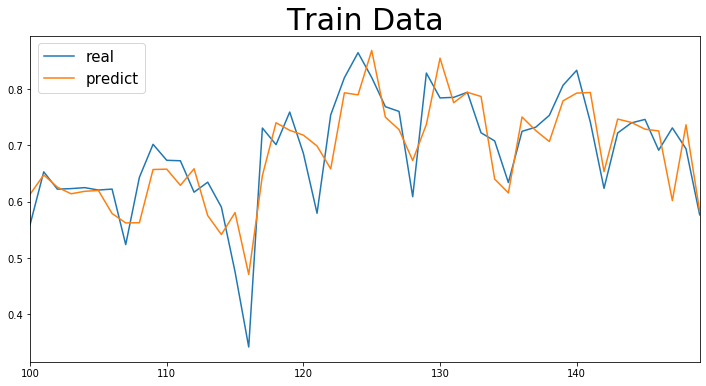

In [85]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

Text(0.5, 1.0, 'Test Data')

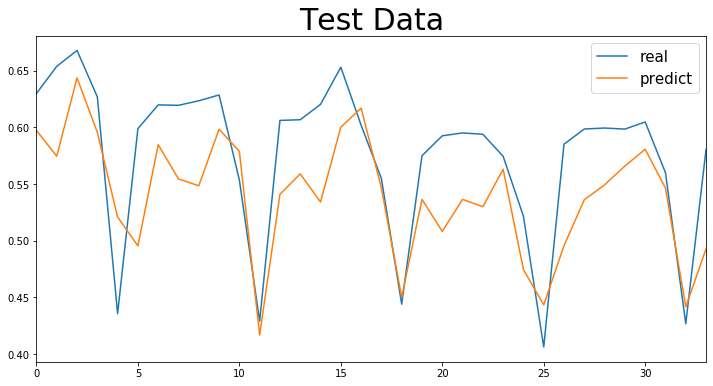

In [86]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [87]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,  y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.03750908963566755
0.0022483087796654135
7.171361769878754
测试集上的MAE/MSE/MAPE
0.04694728713782171
0.0029633593237479196
8.812595955314176
预测涨跌正确: 0.7575757575757576


In [100]:
#建立GRU模型 训练
from keras.layers.recurrent import GRU
#建立、训练模型过程
d = 0.01
model = Sequential()#建立层次模型
model.add(GRU(64, input_shape=(window, input_size), return_sequences=True))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(GRU(16, input_shape=(window, input_size), return_sequences=False))#建立LSTM层
model.add(Dropout(d))#建立的遗忘层
model.add(Dense(4,init='uniform',activation='relu'))   #建立全连接层     
model.add(Dense(1,init='uniform',activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch =100, batch_size = 256) #训练模型nb_epoch次

E:\anoconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
E:\anoconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
E:\anoconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Epoch 1/100
306/306 [==============================] - 2s 5ms/step - loss: 0.4661 - accuracy: 0.0033
Epoch 2/100
306/306 [==============================] - 0s 183us/step - loss: 0.4622 - accuracy: 0.0033
Epoch 3/100
306/306 [==============================] - 0s 202us/step - loss: 0.4582 - accuracy: 0.0033
Epoch 4/100
306/306 [==============================] - 0s 207us/step - loss: 0.4538 - accuracy: 0.0033
Epoch 5/100
306/306 [==============================] - 0s 210us/step - loss: 0.4491 - accuracy: 0.0033
Epoch 6/100
306/306 [==============================] - 0s 169us/step - loss: 0.4440 - accuracy: 0.0033
Epoch 7/100
306/306 [==============================] - 0s 184us/step - loss: 0.4388 - accuracy: 0.0033
Epoch 8/100
306/306 [==============================] - 0s 186us/step - loss: 0.4334 - accuracy: 0.0033
Epoch 9/100
306/306 [==============================] - 0s 196us/step - loss: 0.4278 - accuracy: 0.0033
Epoch 10/100
306/306 [==============================] - 0s 271us/step - los

306/306 [==============================] - 0s 183us/step - loss: 0.0182 - accuracy: 0.0065
Epoch 80/100
306/306 [==============================] - 0s 215us/step - loss: 0.0175 - accuracy: 0.0065
Epoch 81/100
306/306 [==============================] - 0s 196us/step - loss: 0.0168 - accuracy: 0.0065
Epoch 82/100
306/306 [==============================] - 0s 191us/step - loss: 0.0167 - accuracy: 0.0065
Epoch 83/100
306/306 [==============================] - 0s 199us/step - loss: 0.0160 - accuracy: 0.0065
Epoch 84/100
306/306 [==============================] - 0s 169us/step - loss: 0.0152 - accuracy: 0.0065
Epoch 85/100
306/306 [==============================] - 0s 176us/step - loss: 0.0146 - accuracy: 0.0065
Epoch 86/100
306/306 [==============================] - 0s 186us/step - loss: 0.0142 - accuracy: 0.0065
Epoch 87/100
306/306 [==============================] - 0s 192us/step - loss: 0.0139 - accuracy: 0.0065
Epoch 88/100
306/306 [==============================] - 0s 202us/step - loss:

Text(0.5, 1.0, 'Train Data')

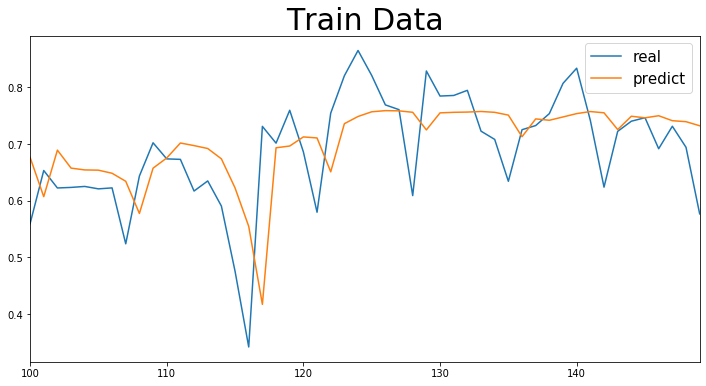

In [101]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

Text(0.5, 1.0, 'Test Data')

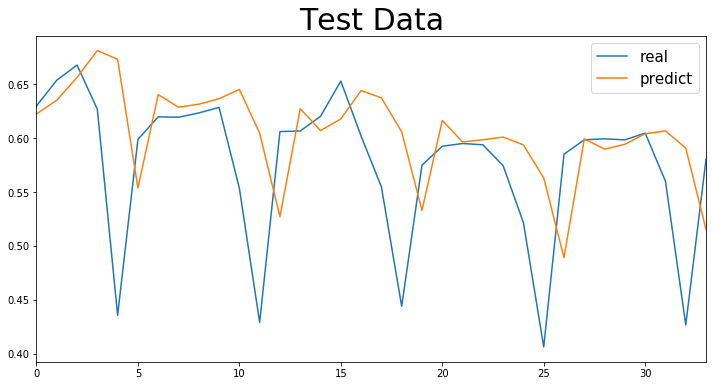

In [102]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [103]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,  y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.07366349008016972
0.010104306084127183
12.215200926048825
测试集上的MAE/MSE/MAPE
0.05405287445725154
0.006479302997912402
9.05261399709468
预测涨跌正确: 0.5454545454545454
